Import all the library here

In [11]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
from sklearn import tree

sb.set() # set the default Seaborn style for graphics

Data input

In [12]:
energyData = pd.read_csv('cleaned.csv')
energyData = pd.DataFrame(energyData)
energyData







,population,gdp,clean_cons_per_capita,clean_consumption,clean_share_energy,fossil_cons_per_capita,fossil_consumption,fossil_share_energy,electricity_demand,energy_per_gdp
0,30774624.0,2.090000e+11,5.189,0.160,0.530,9741.336,299.786,99.948,23.82,1.438
1,31200984.0,2.230000e+11,6.497,0.230,0.650,9955.142,31.610,99.935,24.98,1.391
2,31624700.0,2.450000e+11,5.261,0.166,0.520,1175.890,321.784,99.948,25.97,1.312
3,32055882.0,2.740000e+11,23.975,0.769,0.228,1486.486,336.154,99.772,27.82,1.232
4,32510184.0,2.970000e+11,22.248,0.723,0.270,1736.774,349.540,99.793,29.40,1.179
...,...,...,...,...,...,...,...,...,...,...
1719,91235504.0,5.100000e+11,1848.136,168.616,23.480,6168.360,562.773,76.927,142.69,1.435
1720,92191400.0,5.440000e+11,1675.355,154.453,18.557,735.620,677.612,81.416,158.93,1.530
1721,93126528.0,5.780000e+11,185.490,172.329,19.158,786.388,726.981,8.818,177.08,1.557
1722,94033048.0,6.180000e+11,2489.328,234.780,24.183,781.731,733.620,75.792,192.31,1.567


train/test set create

In [13]:

energyData_train, energyData_test = train_test_split(energyData, test_size = 0.25)
x_train = energyData_train[['population', 'gdp', 'clean_cons_per_capita', 'clean_consumption', 'clean_share_energy', 'fossil_cons_per_capita', 
                            'fossil_consumption', 'fossil_share_energy', 'energy_per_gdp' ]]

y_train = energyData_train['electricity_demand']

x_test = energyData_test[['population', 'gdp', 'clean_cons_per_capita', 'clean_consumption', 'clean_share_energy', 'fossil_cons_per_capita', 
                            'fossil_consumption', 'fossil_share_energy', 'energy_per_gdp' ]]

y_test = energyData_test['electricity_demand']

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1293, 9)
(1293,)
(431, 9)
(431,)


random forest

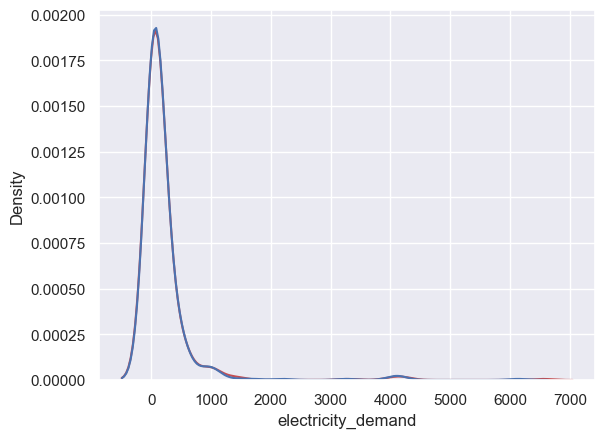

The Mean Sqaured Error of the random forest: 2447.959492206576
The r2 of the random forest: 0.9921482546046941


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

RForestmodel = RandomForestRegressor(n_estimators=500)
RForestmodel.fit(x_train, y_train)
y_pred_randomforest = RForestmodel.predict(x_test)
df_randomforest = pd.DataFrame({"actual":y_test, "predict": y_pred_randomforest})
df_randomforest
ax=plt.axes()
sb.kdeplot(y_test, color="r",
                label= "actual value", ax=ax)
sb.kdeplot(y_pred_randomforest, color="b",
                label= "fitted value", ax=ax)

plt.show()

RForestmean_squared_error = mean_squared_error(y_test, y_pred_randomforest)
print("The Mean Sqaured Error of the random forest:", RForestmean_squared_error)
RForest_R2 = r2_score(y_test, y_pred_randomforest)
print("The r2 of the random forest:", RForest_R2)


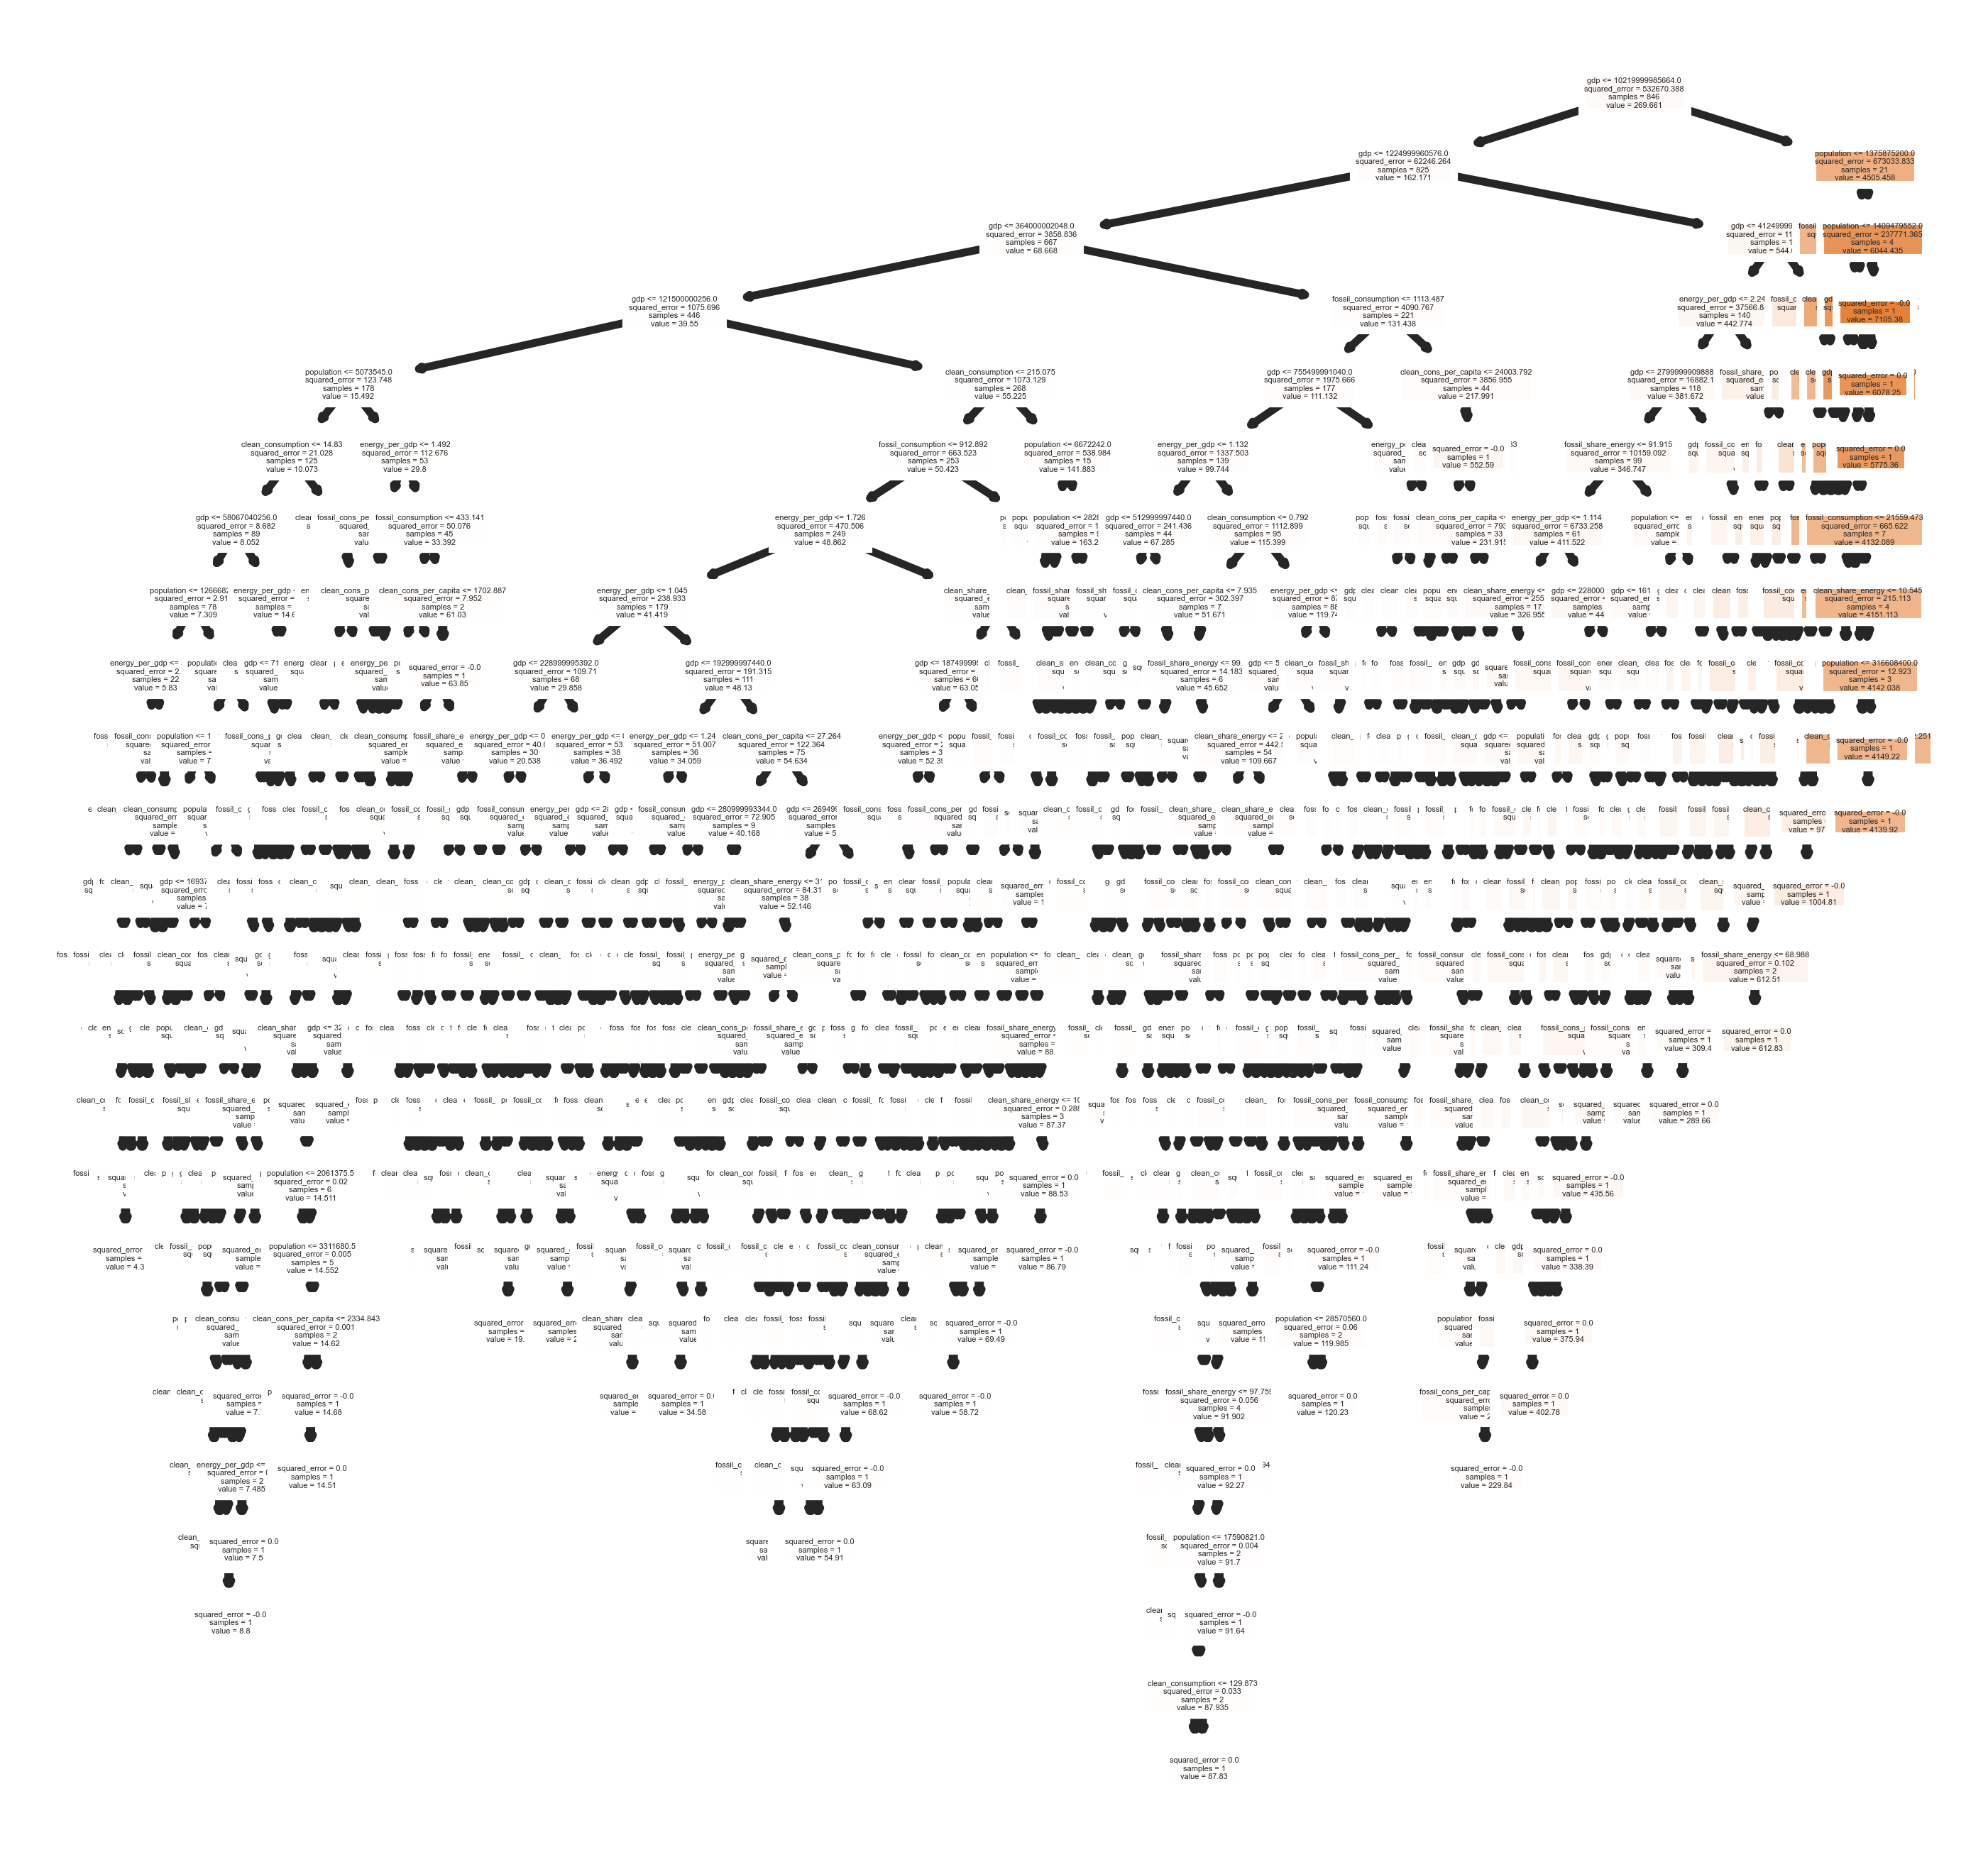

In [16]:
fn=['population', 'gdp', 'clean_cons_per_capita', 'clean_consumption', 'clean_share_energy', 'fossil_cons_per_capita', 
'fossil_consumption', 'fossil_share_energy', 'energy_per_gdp' ]
cn=['electricity_demand']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(RForestmodel.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True)
fig.savefig('rf_individualtree.png')
                  



In [ ]:

import json
import ipywidgets as widgets
from ipyleaflet import Map, GeoJSON, Choropleth, basemaps, LayerGroup
import branca.colormap as cm



# read the geojson data
with open('custom.geo.json') as f:
    geo_json_data = json.load(f)
    for d in geo_json_data["features"]:
        d["name"] = d["properties"]["name"]
       
# get the min and max year available
min_year = energyData['year'].min()
max_year = energyData['year'].max()
print(min_year)
print(max_year)




KeyError: 'year'

In [ ]:
# create the base map
m = Map(center=(0, 0), zoom=2, basemap=basemaps.CartoDB.Positron)
# name changer
proper_name_mapping = {
    "Russian Federation":"Russia",
    "Czech Republic":"Czechia",
    "Macedonia, FYR":"Macedonia",
    "Central African Republic":"Central African Rep.",
    "Bosnia and Herzegovina":"Bosnia and Herz.",
    "Slovak Republic":"Slovakia",
    "Iran, Islamic Rep.":"Iran",
    "Somaliland":"Somalia",
    "Dominican Republic":"Dominican Rep.",
    "Venezuela, RB":"Venezuela",
    "Lao PDR":"Laos",
    "Yemen, Rep.":"Yemen",
    "South Sudan":"S. Sudan",
    "Papua New Guinea":"Guinea",
    "Congo, Rep.":"Congo",
    "Congo, Dem. Rep.":"Dem. Rep. Congo",
    "Cyprus, Northern":"N. Cyprus",
    "Kyrgyz Republic":"Kyrgyzstan",
    "Korea, Dem. Rep.":"South Korea",
    "Palestine (West Bank and Gaza)":"Palestinian",
    "Syrian Arab Republic":"Syria",
    "Egypt, Arab Rep.":"Egypt",
    "Gambia, The":"Gambia"

}


# create a colormap
color_scale = cm.LinearColormap(colors=['green', 'yellow', 'red'], vmin=0, vmax=energyData['gdp'].max())

def update_choropleth(year):
    # filter the data for the current year and remove the rows where the GDP value is missing
    
    try:
        choro_data = energyData.loc[(energyData['year'] == year) & (energyData['gdp'].notna()),].copy()
    except KeyError:
        # If a KeyError is raised, add a new row with 'gdp' equal to 0 for each missing country value
        missing_countries = set(energyData['country']) - set(choro_data['country'])
        new_rows = [{'year': year, 'country': country, 'gdp': 0} for country in missing_countries]
        new_df = pd.DataFrame(new_rows)
        choro_data = choro_data.append(new_df, ignore_index=True)

    
        
    choro_data  = dict(zip(choro_data["country"].tolist(), choro_data["gdp"]))
    for d in geo_json_data["features"]:
        if d["name"] in proper_name_mapping.keys():
            choro_data[d["name"]] = choro_data[proper_name_mapping[d["name"]]]
        elif d["name"] in choro_data:
            choro_data[d["name"]] = choro_data[d["name"]]
        else:
            choro_data[d["name"]] = 0

    print (choro_data)
    # create a choropleth layer
    choropleth_layer = Choropleth(
        geo_data=geo_json_data,
        choro_data=choro_data,
        colormap=color_scale,
        style={'fillOpacity': 1.0, 'weight': 0.5},
        name='GDP Choropleth',
        key_on= "name"
    )
    
    # remove the previous choropleth layer (if any) and add the new one
    layer_group.clear_layers()
    layer_group.add_layer(choropleth_layer)

# create a layer group to hold the choropleth layer
layer_group = LayerGroup()
m.add_layer(layer_group)
# display the map
display(m)

# add the slider to the map

widgets.interact(update_choropleth, year=widgets.IntSlider(min=min_year, max=max_year, step=1, value=min_year))







Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

interactive(children=(IntSlider(value=1900, description='year', max=2022, min=1900), Output()), _dom_classes=(…

<function __main__.update_choropleth(year)>